In [1]:
import numpy as np
import matplotlib.pyplot as plt
from data_generators.basic_generator import BasicDataGenerator
from data_generators.standard_generator import StandardDataGenerator

In [24]:
data_gen = StandardDataGenerator(filename='src/basic005.json')
categories = ["C1", "C2", "C3"]

### Prices, bids, margins ... 

In [3]:
prices = data_gen.get_prices()
bids = data_gen.get_bids()
margins = data_gen.get_margins()
print(f'{prices=}')
print(f'{bids=}')
print(f'{margins=}')

prices=[15, 16, 17, 18, 19, 20, 21, 22, 23, 24]
bids=[0.3, 0.35, 0.4, 0.5, 0.6, 0.75, 0.9, 1.0, 1.25, 1.5]
margins=[3, 4, 5, 6, 7, 8, 9, 10, 11, 12]


### Class distributions
#### Convertion rates

In [4]:
help(data_gen.get_conversion_rates)

Help on method get_conversion_rates in module data_generators.standard_generator:

get_conversion_rates(mode='all', bid=None) method of data_generators.standard_generator.StandardDataGenerator instance
    Get the conversion rates distribution. The output depends on the `mode` kwarg.
    [options: mode = `all` -> disjoint (default), mode = `aggregate` -> aggregation performed as a weighted average]



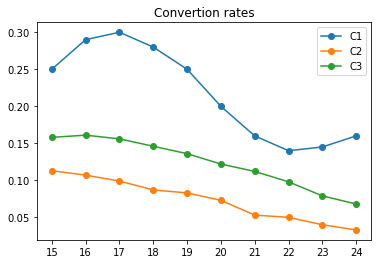

In [5]:
conv_rates = data_gen.get_conversion_rates()

plt.figure()
plt.xticks(prices)
for i in range(0,len(conv_rates)):
    plt.plot(prices, conv_rates[i], '-o', label=categories[i])
    
plt.legend(loc='best')
plt.title("Convertion rates")
plt.show()

In [6]:
aggr_conv_rate = data_gen.get_conversion_rates(mode='aggregate')
plt.figure()
plt.xticks(prices)
plt.plot(prices, aggr_conv_rate, '-o')    
plt.title("Convertion rate")
plt.show()

TypeError: `bid` kwarg must be set if the mode is `aggregate`

In [7]:
print(f'{aggr_conv_rate=}')

NameError: name 'aggr_conv_rate' is not defined

#### Daily clicks

In [8]:
help(data_gen.get_daily_clicks)

Help on method get_daily_clicks in module data_generators.standard_generator:

get_daily_clicks(mode='all') method of data_generators.standard_generator.StandardDataGenerator instance
            Get the distribution probability over the number of daily clicks with respect to the bid of the advertisement
            campaign given the price.
            
    The output depends on the `mode` kwarg.
            [options: mode = `all` -> disjoint (default), mode = `aggregate` -> aggregation performed as a weighted average]
            
    Model: `upper_bound` * (1.0 - exp(-1 * `speed_factor` * `bids`))



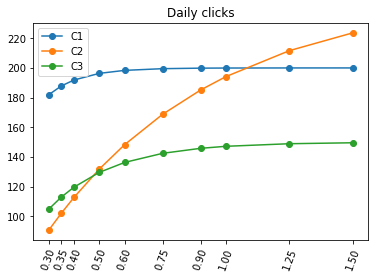

In [9]:
daily_clicks = data_gen.get_daily_clicks()

plt.figure()
plt.xticks(bids, rotation = 70)

for i in range(0,len(daily_clicks)):
    plt.plot(bids, daily_clicks[i], '-o', label=categories[i])
    
plt.legend(loc='best')
plt.title("Daily clicks")
plt.show()

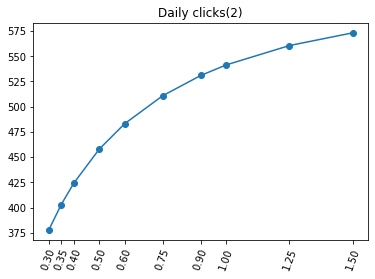

In [10]:
aggr_daily_click = data_gen.get_daily_clicks(mode='aggregate')
plt.figure()
plt.xticks(bids, rotation = 70)
plt.plot(bids, aggr_daily_click, '-o')    
plt.title("Daily clicks(2)")
plt.show()

In [11]:
print(f'{aggr_daily_click=}')

aggr_daily_click=array([377.27 , 402.96 , 424.36 , 457.945, 483.104, 510.873, 530.942,
       541.403, 560.641, 573.277])


#### Costs per click

In [12]:
help(data_gen.get_costs_per_click)

Help on method get_costs_per_click in module data_generators.standard_generator:

get_costs_per_click(mode='all', bid=None) method of data_generators.standard_generator.StandardDataGenerator instance
            Get the distribution probability over the cost per click as a function of the bid
            
    The output depends on the `mode` kwarg.
            [options: mode = `all` -> disjoint (default), mode = `aggregate` -> aggregation performed as a weighted average]
            
    Model: `coefficient` * log(1 + `bids`/`coefficient`)



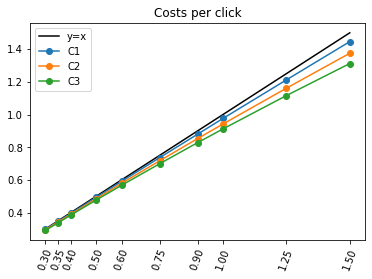

In [13]:
costs = data_gen.get_costs_per_click()

plt.figure()
plt.xticks(bids, rotation = 70)
plt.plot(bids,bids, color='black', label="y=x")
for i in range(0,len(costs)):
    plt.plot(bids, costs[i], '-o', label=categories[i])
    
plt.legend(loc='best')
plt.title("Costs per click")
plt.show()

In [14]:
aggr_costs = data_gen.get_costs_per_click(mode='aggregate')
plt.figure()
plt.xticks(bids, rotation = 70)
plt.plot(bids,bids, color='black', label="y=x")
plt.plot(bids, aggr_costs, '-o')
plt.legend(loc='best')
plt.title("Costs per click(2)")
plt.show()

TypeError: `bid` kwarg must be set if the mode is `aggregate`

In [15]:
print(f'{aggr_costs=}')

NameError: name 'aggr_costs' is not defined

#### Future purchases

In [16]:
help(data_gen.get_future_purchases)

Help on method get_future_purchases in module data_generators.standard_generator:

get_future_purchases(mode='all', bid=None) method of data_generators.standard_generator.StandardDataGenerator instance
            Get the distribution probability over the number of times the user will come back to the
            ecommerce website to buy another consumable item by 30 days after the first purchase (at the same price).
    
            The output depends on the `mode` kwarg.
    
            [options: mode = `all` -> disjoint (default), mode = `aggregate` -> aggregation performed as a weighted average]
            
    Model: np.maximum('lower_bound', 'coefficient'*(- prices + min(prices)) + 'upper_bound')



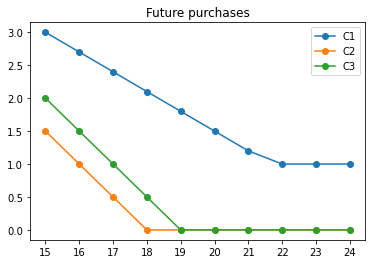

In [25]:
next_purch = data_gen.get_future_purchases()

plt.figure()
plt.xticks(prices)
for i in range(0,len(next_purch)):
    plt.plot(prices, next_purch[i], '-o', label=categories[i])
    
plt.legend(loc='best')
plt.title("Future purchases")

plt.show()

In [18]:
aggr_purch = data_gen.get_future_purchases(mode='aggregate')
plt.figure()
plt.xticks(prices)
plt.plot(prices, aggr_purch, '-o')
plt.title("Future purchases(2)")
plt.show()

TypeError: `bid` kwarg must be set if the mode is `aggregate`

___

In [19]:
dg = StandardDataGenerator('src/basic004.json')
print('src:\t',dg.get_source())
print('\nbid\tr_aggr\t\tglobal\t\t\tdelta')
for j, bid in enumerate(dg.get_bids()):
    maxs=[]
    cost = dg.get_costs_per_click(mode='aggregate', bid=j)[j]
    clicks = dg.get_daily_clicks(mode='aggregate')[j]
    conv = dg.get_conversion_rates()
    fp = dg.get_future_purchases()
    for i in range(len(dg.get_classes())):
        maxs.append(np.max((conv[i] *(1 + fp[i]) * dg.get_margins() - cost) * dg.get_daily_clicks()[i, j]))
    
    temp = (dg.get_margins() * np.average(conv * (1 + fp), axis=0, weights=dg.get_class_distributions(bid=j)) - 
        cost) * clicks
    disaggr = np.around(sum(maxs), decimals=4)
    aggr = np.around(np.max(temp), decimals=4)
    delta = np.around(disaggr-aggr, decimals=4)
    print(f'{j}\t{disaggr}\t{aggr}\t-->\t{delta}')

src:	 src/basic004.json

bid	r_aggr		global			delta
0	1026.7894	1026.6897	-->	0.0997
1	1053.4803	1053.3706	-->	0.1097
2	1066.5876	1066.461	-->	0.1266
3	1066.6261	1066.481	-->	0.1451
4	1045.6414	1045.4783	-->	0.1631
5	993.8633	993.6776	-->	0.1857
6	929.5395	929.3358	-->	0.2037
7	883.072	882.8584	-->	0.2136
8	760.0932	759.8604	-->	0.2328
9	634.5036	634.2576	-->	0.246


In [29]:
dg = StandardDataGenerator('src/basic006.json')
print('src:\t',dg.get_source())
print('\nbid\tglobal\t\tr_aggr\t\t\tdelta')
for j, bid in enumerate(dg.get_bids()):
    maxs=[]
    cost = dg.get_costs_per_click(mode='aggregate', bid=j)[j]
    clicks = dg.get_daily_clicks(mode='aggregate')[j]
    conv = dg.get_conversion_rates()
    fp = dg.get_future_purchases()
    margins = dg.get_margins()
    print(f'------------bid={j}------------')
    print(f'{cost=}')
    print(f'{clicks=}')
    print(f'{conv=}')
    print(f'{fp=}')
    print(f'{margins=}')

    for i in range(len(dg.get_classes())):
        print(f'------class={i}-----')
        
        class_click = dg.get_daily_clicks()[i, j]
        values = (conv[i] *(1 + fp[i]) * margins - cost) * class_click
        print(f'{class_click=}')
        print(f'{values=}')
        maxs.append(np.max(values))
    
    temp = (dg.get_margins() * np.average(conv * (1 + fp), axis=0, weights=dg.get_class_distributions(bid=j)) - 
        cost) * clicks
    print(f'{maxs=}')
    disaggr = np.around(sum(maxs), decimals=4)
    aggr = np.around(np.max(temp), decimals=4)
    delta = np.around(disaggr-aggr, decimals=4)
    print(f'{j}\t{disaggr}\t{aggr}\t-->\t{delta}')

src:	 src/basic006.json

bid	global		r_aggr			delta
------------bid=0------------
cost=0.295
clicks=377.27
conv=array([[0.25 , 0.29 , 0.3  , 0.28 , 0.25 , 0.2  , 0.16 , 0.14 , 0.145,
        0.16 ],
       [0.113, 0.107, 0.099, 0.087, 0.083, 0.073, 0.053, 0.05 , 0.04 ,
        0.033],
       [0.158, 0.161, 0.156, 0.146, 0.136, 0.122, 0.112, 0.098, 0.079,
        0.068]])
fp=array([[3. , 2.8, 2.6, 2.4, 2.2, 2. , 1.8, 1.6, 1.4, 1.2],
       [1.5, 1.2, 0.9, 0.6, 0.3, 0. , 0. , 0. , 0. , 0. ],
       [2. , 1.7, 1.4, 1.1, 0.8, 0.5, 0.2, 0. , 0. , 0. ]])
margins=[3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
------class=0-----
class_click=181.856
values=array([491.92048 , 747.973728, 928.37488 , 985.113952, 964.74608 ,
       819.26128 , 679.595872, 608.30832 , 642.497248, 714.512224])
------class=1-----
class_click=90.593
values=array([50.0526325, 58.5774338, 58.4777815, 48.9383386, 41.6999579,
       26.181377 , 16.487926 , 18.571565 , 13.135985 ,  9.149893 ])
------class=2-----
class_click=104.821
val

In [27]:
dg = StandardDataGenerator('src/basic005.json')
print('src:\t',dg.get_source())
print('\nbid\tglobal\t\tr_aggr\t\t\tdelta')
for j, bid in enumerate(dg.get_bids()):
    maxs=[]
    cost = dg.get_costs_per_click(mode='aggregate', bid=j)[j]
    clicks = dg.get_daily_clicks(mode='aggregate')[j]
    conv = dg.get_conversion_rates()
    fp = dg.get_future_purchases()
    for i in range(len(dg.get_classes())):
        maxs.append(np.max((conv[i] *(1 + fp[i]) * dg.get_margins() - cost) * dg.get_daily_clicks()[i, j]))
    
    temp = (dg.get_margins() * np.average(conv * (1 + fp), axis=0, weights=dg.get_class_distributions(bid=j)) - 
        cost) * clicks
    disaggr = np.around(sum(maxs), decimals=4)
    aggr = np.around(np.max(temp), decimals=4)
    delta = np.around(disaggr-aggr, decimals=4)
    print(f'{j}\t{disaggr}\t{aggr}\t-->\t{delta}')

src:	 src/basic005.json

bid	global		r_aggr			delta
0	1082.1208	1046.957	-->	35.1638
1	1109.3985	1071.8745	-->	37.524
2	1122.5162	1083.0058	-->	39.5104
3	1121.6921	1079.0311	-->	42.661
4	1099.4129	1054.3324	-->	45.0805
5	1045.7001	997.8641	-->	47.836
6	979.7609	929.8629	-->	49.898
7	932.4109	881.4119	-->	50.999
8	807.7785	754.7065	-->	53.072
9	681.0982	626.6326	-->	54.4656
